In [1]:
pip install easyocr

In [2]:
import easyocr
reader = easyocr.Reader(['en'])

# Front

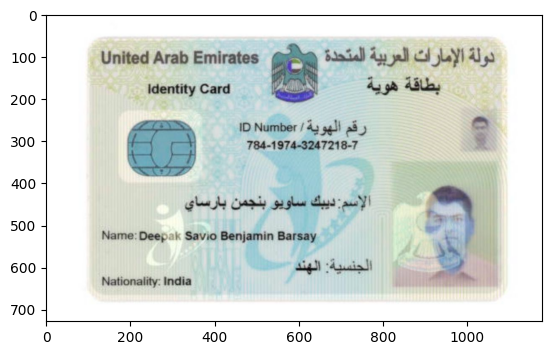

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('govidfront.jpeg')
plt.imshow(img)

In [4]:
result = reader.readtext(img)

In [5]:
print(result)

[([[126, 79], [512, 79], [512, 127], [126, 127]], 'United Arab Emirates', 0.9999527375181817), ([[651, 69], [1077, 69], [1077, 136], [651, 136]], 'ii @Jajyias', 0.06133409999650343), ([[234, 155], [444, 155], [444, 203], [234, 203]], 'Identity Card', 0.8704390729359772), ([[756, 142], [844, 142], [844, 194], [756, 194]], '10', 0.15289505058121017), ([[452, 246], [770, 246], [770, 296], [452, 296]], 'ID Number / js4ll 4)', 0.22995557168533795), ([[474, 296], [746, 296], [746, 328], [474, 328]], '784-1974-3247218-7', 0.7271794738779702), ([[320, 420], [696, 420], [696, 474], [320, 474]], '4uoyi9 4', 0.050597228543755875), ([[128, 509], [650, 509], [650, 549], [128, 549]], 'Name: Deepak Savio Benjamin Barsay', 0.8345979807010198), ([[587, 575], [783, 575], [783, 619], [587, 619]], 'f', 0.4857443962271333), ([[129, 617], [352, 617], [352, 650], [129, 650]], 'Nationality: India', 0.7422347986677231), ([[848.0729607040108, 136.08669173125764], [949.7930319810711, 150.57632713433532], [940.92

In [6]:
def draw_bounding_boxes(img,result):
  for box,text,prob in result:
     cv2.rectangle(img, tuple(map(int, box[0])), tuple(map(int, box[2])), (0, 255, 0), 5)
     cv2.putText(img, text, tuple(map(int, box[0])), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.65, (255, 0, 0), 2)

In [7]:
draw_bounding_boxes(img,result)

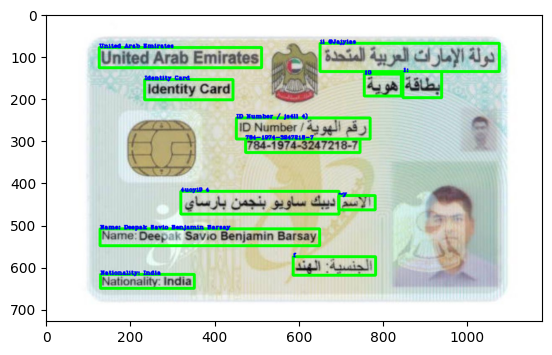

In [8]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [9]:
for (box,text,prob) in result:
  print(text)

United Arab Emirates
ii @Jajyias
Identity Card
10
ID Number / js4ll 4)
784-1974-3247218-7
4uoyi9 4
Name: Deepak Savio Benjamin Barsay
f
Nationality: India
1:
~y


In [13]:
extracted_lines = []
for (box,text,prob) in result:
  extracted_lines.append(text)

In [14]:
print(extracted_lines)

['United Arab Emirates', 'ii @Jajyias', 'Identity Card', '10', 'ID Number / js4ll 4)', '784-1974-3247218-7', '4uoyi9 4', 'Name: Deepak Savio Benjamin Barsay', 'f', 'Nationality: India', '1:', '~y']


In [17]:
front_text = '\n'.join(extracted_lines)
print(front_text)

United Arab Emirates
ii @Jajyias
Identity Card
10
ID Number / js4ll 4)
784-1974-3247218-7
4uoyi9 4
Name: Deepak Savio Benjamin Barsay
f
Nationality: India
1:
~y


In [21]:
import re

id_number_match = re.search(r'(\d{3}-\d{4}-\d{7}-\d{1})', front_text)
# Updated Name regex to stop before the keyword "Nationality"
name_match = re.search(r'Name:\s*([A-Za-z\s]+)(?=\nf)', front_text)
# Nationality regex: only captures when the actual nationality is provided
nationality_match = re.search(r'Nationality\s*[:\n]+\s*([A-Za-z]+)', front_text)

# Extracting the values
id_number = id_number_match.group(1) if id_number_match else None
name = name_match.group(1).strip() if name_match else None
nationality = nationality_match.group(1).strip() if nationality_match else None

# Printing the extracted values
print(f'ID Number: {id_number}')
print(f'Name: {name}')
print(f'Nationality: {nationality}')

ID Number: 784-1974-3247218-7
Name: Deepak Savio Benjamin Barsay
Nationality: India


# Back

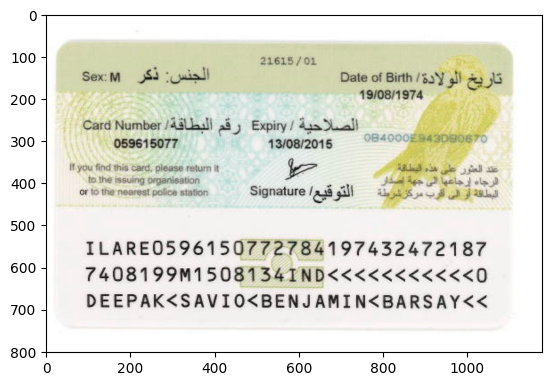

In [23]:
back_img = cv2.imread('govidback.jpeg')
plt.imshow(back_img)

In [24]:
result2 = reader.readtext(back_img)

In [26]:
print(result2)

[([[504, 96], [648, 96], [648, 128], [504, 128]], '21615 /01', 0.975817533002822), ([[81, 131], [183, 131], [183, 167], [81, 167]], 'Sex: M', 0.9332766131747332), ([[270, 116], [401, 116], [401, 176], [270, 176]], ':il', 0.2418914154704186), ([[695, 133], [877, 133], [877, 169], [695, 169]], 'Date of Birth', 0.7886890345532311), ([[867, 125], [1095, 125], [1095, 187], [867, 187]], 'VY4&', 0.05746083706617355), ([[741, 173], [903, 173], [903, 209], [741, 209]], '19/08/1974', 0.7843795048318389), ([[84, 238], [468, 238], [468, 294], [84, 294]], 'Card Number / JLLJl 4)', 0.17743092844840924), ([[482, 240], [750, 240], [750, 290], [482, 290]], 'Expiry / Lelall', 0.3101369456730078), ([[158, 292], [318, 292], [318, 324], [158, 324]], '059615077', 0.9907517578144295), ([[523, 291], [687, 291], [687, 327], [523, 327]], '13/08/2015', 0.9611181799431375), ([[750, 276], [1021, 276], [1021, 313], [750, 313]], '0B4000E3430805', 0.23682673289238435), ([[52, 350], [396, 350], [396, 380], [52, 380]],

In [27]:
draw_bounding_boxes(back_img,result2)

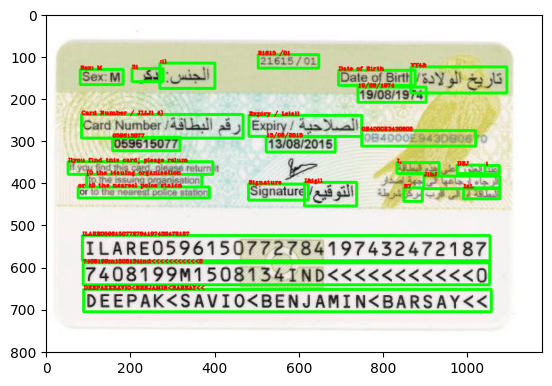

In [28]:
plt.imshow(back_img)

In [30]:
extracted_line2 = []
for (box,text,prob) in result2:
  extracted_line2.append(text)

back_text = '\n'.join(extracted_line2)
print(back_text)

21615 /01
Sex: M
:il
Date of Birth
VY4&
19/08/1974
Card Number / JLLJl 4)
Expiry / Lelall
059615077
13/08/2015
0B4000E3430805
Ilyou find tnis card; pleage relum
I,
1
[0 the i4sulng organisation
JibJ
or t0 the nearesl polce sta1cn
Signature
I&igll
IaL
ILARE0596150772784197432472187
7408199m1508134ind<<<<<<<<<<<0
DEEPAKKSAVIO<BENJAMIN<BARSAY<<
3i
DEJ
S7


In [31]:
sex_match = re.search(r'Sex[:\s]+([MF])', back_text)
dob_match = re.search(r'Date of Birth.*?(\d{2}/\d{2}/\d{4})', back_text, re.DOTALL)
card_number_match = re.search(r'Card Number.*?(\d{9})', back_text, re.DOTALL)
expiry_match = re.search(r'Expiry.*?(\d{2}/\d{2}/\d{4})', back_text, re.DOTALL)

# Extract the values
sex = sex_match.group(1) if sex_match else None
dob = dob_match.group(1) if dob_match else None
card_number = card_number_match.group(1) if card_number_match else None
expiry = expiry_match.group(1) if expiry_match else None

# Ensure DOB and Expiry are not the same
if dob == expiry:
    # Search for another expiry date specifically after the Card Number keyword
    expiry_search = re.search(r'(\d{2}/\d{2}/\d{4})', back_text.split('Card Number')[-1], re.DOTALL)
    if expiry_search:
        expiry = expiry_search.group(1)

# Print the extracted values
print(f'Sex: {sex}')
print(f'DOB: {dob}')
print(f'Card Number: {card_number}')
print(f'Expiry: {expiry}')


Sex: M
DOB: 19/08/1974
Card Number: 059615077
Expiry: 13/08/2015


# Final Result

In [32]:
print(f'ID Number: {id_number}')
print(f'Name: {name}')
print(f'Nationality: {nationality}')
print(f'Sex: {sex}')
print(f'DOB: {dob}')
print(f'Card Number: {card_number}')
print(f'Expiry: {expiry}')

ID Number: 784-1974-3247218-7
Name: Deepak Savio Benjamin Barsay
Nationality: India
Sex: M
DOB: 19/08/1974
Card Number: 059615077
Expiry: 13/08/2015
